In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# First phase let's build a SVM

1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
!pwd

/kaggle/working


In [4]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train['SibSp'].value_counts()

print(df_train[df_train['SibSp'] == 0]['Survived'].sum()/len(df_train[df_train['SibSp'] == 0]))
print(df_train[df_train['SibSp'] == 1]['Survived'].sum()/len(df_train[df_train['SibSp'] == 1]))
print(df_train[df_train['SibSp'] == 2]['Survived'].sum()/len(df_train[df_train['SibSp'] == 2]))
print(df_train[df_train['SibSp'] == 3]['Survived'].sum()/len(df_train[df_train['SibSp'] == 3]))
print(df_train[df_train['SibSp'] == 4]['Survived'].sum()/len(df_train[df_train['SibSp'] == 4]))
print(df_train[df_train['SibSp'] == 8]['Survived'].sum()/len(df_train[df_train['SibSp'] == 8]))
print(df_train[df_train['SibSp'] == 5]['Survived'].sum()/len(df_train[df_train['SibSp'] == 5]))

0.34539473684210525
0.5358851674641149
0.4642857142857143
0.25
0.16666666666666666
0.0
0.0


(array([372., 119.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

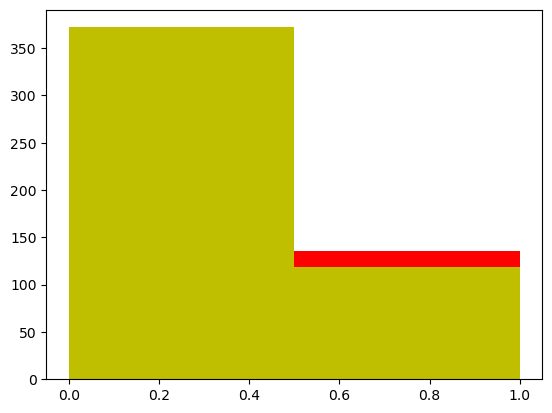

In [7]:
plt.hist(df_train[df_train['Pclass'] == 1]['Survived'], bins=2, color='r', stacked=True)
plt.hist(df_train[df_train['Pclass'] == 2]['Survived'], bins=2, color='b', stacked=True)
plt.hist(df_train[df_train['Pclass'] == 3]['Survived'], bins=2, color='y', stacked=True)

(array([372.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 119.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

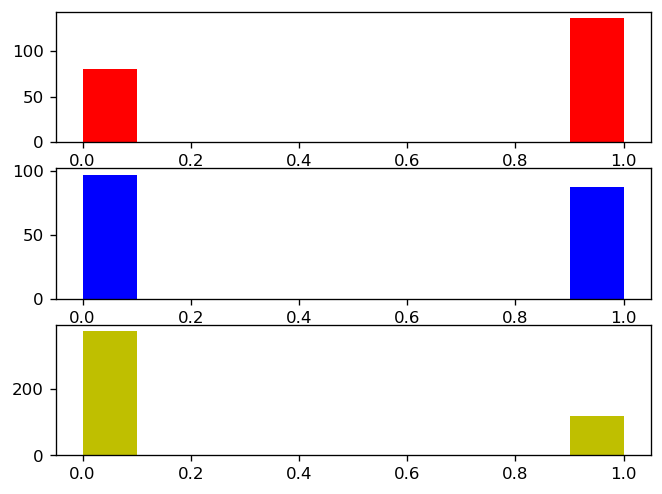

In [8]:
fix, ax = plt.subplots(3)
fix.dpi=120
ax[0].hist(df_train[df_train['Pclass'] == 1]['Survived'], color='r')
ax[1].hist(df_train[df_train['Pclass'] == 2]['Survived'], color='b')
ax[2].hist(df_train[df_train['Pclass'] == 3]['Survived'], color='y')

In [9]:
female_rate = (df_train[df_train['Sex']=='female']['Survived'].sum()/len(df_train[df_train['Sex']=='female']))
male_rate = (df_train[df_train['Sex']=='male']['Survived'].sum()/len(df_train[df_train['Sex']=='female']))

In [10]:
# plt.hist(, color='r', stacked=True, align='mid')

In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Typical null check
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [13]:
df_train['Embarked'].mode()[0]

'S'

In [14]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

# We don't use Cabin column.

In [15]:
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [16]:
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

# We don't use Cabin column.

In [17]:
df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [18]:
survived_avg_fare = df_train[df_train['Survived']==1]['Fare'].mean()
not_survived_avg_fare = df_train[df_train['Survived']==0]['Fare'].mean()
print(survived_avg_fare)
print(not_survived_avg_fare)

48.39540760233918
22.117886885245902


([<matplotlib.axis.YTick at 0x79eada977b20>,
 [Text(0, 0.0, '0'), Text(0, 1.0, '1')])

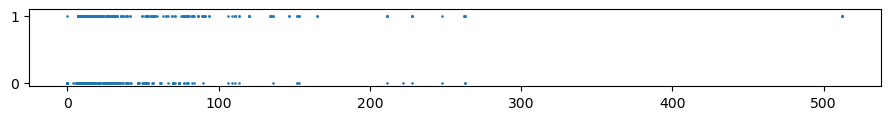

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(11, 1))
plt.scatter(df_train['Fare'], df_train['Survived'], s=0.9, alpha=0.9)
plt.ylim(top=1.1)
plt.yticks(np.arange(0, 1.1, step=1))

# OK maybe scatter is not the best way to show the data. Let's try hist.

([<matplotlib.axis.YTick at 0x79eada9c3ac0>,
 [Text(0, 0, '0'),
  Text(0, 50, '50'),
  Text(0, 100, '100'),
  Text(0, 150, '150'),
  Text(0, 200, '200'),
  Text(0, 250, '250'),
  Text(0, 300, '300'),
  Text(0, 350, '350'),
  Text(0, 400, '400'),
  Text(0, 450, '450'),
  Text(0, 500, '500'),
  Text(0, 550, '550'),
  Text(0, 600, '600')])

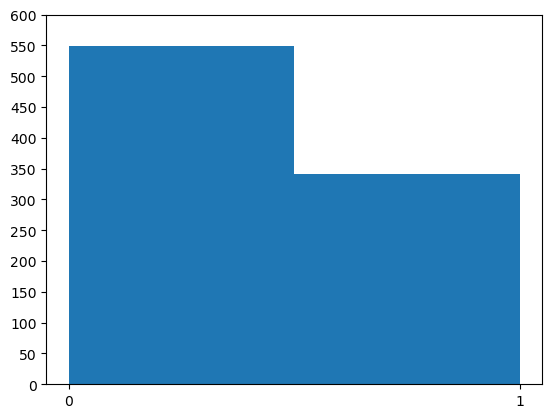

In [20]:
# figure(figsize=(1, 4))
plt.hist(df_train['Survived'], bins=2, range=(0, 1,))
plt.xticks(np.arange(0, 1.1, step=1))
plt.yticks(np.arange(0, 610, step=50))

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

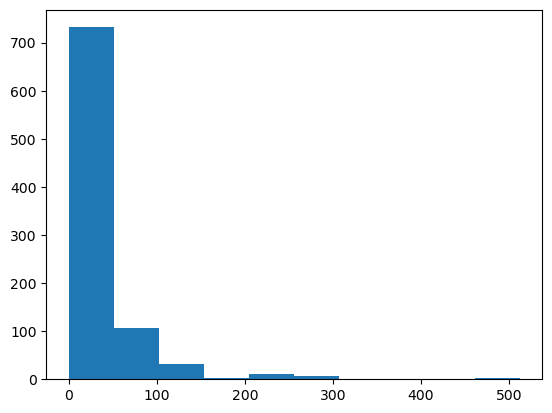

In [21]:
plt.hist(df_train['Fare'])

In [22]:
# >>> from sklearn import preprocessing
# >>> le = preprocessing.LabelEncoder()
# >>> le.fit([1, 2, 2, 6])
# LabelEncoder()
# >>> le.classes_
# array([1, 2, 6])
# >>> le.transform([1, 1, 2, 6])
# array([0, 0, 1, 2]...)
# >>> le.inverse_transform([0, 0, 1, 2])
# array([1, 1, 2, 6])

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
z = le.fit_transform(df_train['Sex'])
df_train['SexCat'] = z

In [24]:
test_le = preprocessing.LabelEncoder()
zz = test_le.fit_transform(df_test['Sex'])
df_test['SexCat'] = zz

In [25]:
em_le = preprocessing.LabelEncoder()
em_cat = em_le.fit_transform(df_train['Embarked'])
df_train['EmCat'] = em_cat

em_test_le = preprocessing.LabelEncoder()
em_cat = em_test_le.fit_transform(df_test['Embarked'])
df_test['EmCat'] = em_cat

In [26]:
# Checking the relationship between cabin and survived? Maybe class is enough.

df_train['Cabin'].value_counts()
cabin_values = df_train['Cabin'].dropna().values
cab_sorted = sorted(cabin_values.astype(str))
df_train.groupby(['Cabin']).sum().sort_values(by=['Survived'], ascending=False)

# There can be relationship between the first letter of Cabin with survived
# TODO check this.

/tmp/ipykernel_21/185210738.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train.groupby(['Cabin']).sum().sort_values(by=['Survived'], ascending=False)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexCat,EmCat
Cabin,,,,,,,,,
B96 B98,2394,4,4,97.000000,4,8,480.00,2,8
E101,1146,3,6,89.199118,0,0,35.85,0,5
F33,930,3,6,87.000000,0,0,34.00,0,6
C23 C25 C27,898,2,4,130.000000,10,10,1052.00,2,8
C52,487,2,2,57.699118,0,0,62.05,2,4
...,...,...,...,...,...,...,...,...,...
C46,742,0,1,36.000000,1,0,78.85,1,2
C30,493,0,1,55.000000,0,0,30.50,1,2
C128,352,0,1,29.699118,0,0,35.00,1,2


In [27]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCat,EmCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,0


In [28]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCat,EmCat
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S,1,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,2
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S,1,2


In [29]:
# Turning Embarked to one-hot vector
# Drop the ticket and cabin, maybe even drop the SibSp and Parch???
# TODO test this.

corr_labels = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'EmCat', 'SexCat']
corrected_df = df_train[corr_labels + ["Survived"]]

In [30]:
corrected_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,EmCat,SexCat,Survived
0,1,3,22.000000,1,0,7.2500,2,1,0
1,2,1,38.000000,1,0,71.2833,0,0,1
2,3,3,26.000000,0,0,7.9250,2,0,1
3,4,1,35.000000,1,0,53.1000,2,0,1
4,5,3,35.000000,0,0,8.0500,2,1,0
...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,2,1,0
887,888,1,19.000000,0,0,30.0000,2,0,1
888,889,3,29.699118,1,2,23.4500,2,0,0
889,890,1,26.000000,0,0,30.0000,0,1,1


In [31]:
n_fare = (corrected_df['Fare']-corrected_df['Fare'].mean()) / corrected_df['Fare'].std()

In [32]:
corrected_df['Fare'] = n_fare

/tmp/ipykernel_21/1335998669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_df['Fare'] = n_fare


In [33]:
from sklearn.model_selection import train_test_split

corr_y = corrected_df['Survived']
corr_x = corrected_df[corr_labels]

x_train, x_test, y_train, y_test = train_test_split(corr_x, corr_y, test_size=0.2, random_state=1)

In [34]:
# No need to one hot, since we are using LabelEncoder

# from sklearn.preprocessing import OneHotEncoder
# onehot_encoder = OneHotEncoder(sparse=False)
# x_train = onehot_encoder.fit_transform(x_train)
# x_test = onehot_encoder.fit_transform(x_test)

In [35]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(x_train, y_train)

LinearSVR(epsilon=1.5)

In [36]:
from sklearn.metrics import accuracy_score

svm_pred = svm_reg.predict(x_test)
accuracy_score(y_test, svm_pred)


0.5921787709497207

In [37]:
svm_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
# Implementing Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(random_state=11, alpha=0.001)
classifier.fit(x_train, y_train)


SGDClassifier(alpha=0.001, random_state=11)

In [39]:
SGDClassifier?

In [40]:
sgd_pred = classifier.predict(x_test)

In [41]:
accuracy_score(y_test, sgd_pred)

0.4022346368715084

In [42]:
sgd_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Report 8/16/23:

Got 78 percent accuracy with SDGClassifier while getting only 59 percent accuracy score with SVR, couldn't make the one hot encoder work with test and train. Let's try non sparse model and then a label or odinal encoder, however these would imply an order.

In [43]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCat,EmCat
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S,1,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,2
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S,1,2


In [44]:
corr_test_x = df_test[corr_labels]

In [45]:
nt_fare = (corr_test_x['Fare'] - corr_test_x['Fare'].mean()) / corr_test_x['Fare'].std()
corr_test_x['Fare'] = nt_fare

/tmp/ipykernel_21/3624540031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_test_x['Fare'] = nt_fare


In [46]:
final_pred = classifier.predict(x_test)

In [47]:
accuracy_score(y_test, final_pred)

0.4022346368715084

The results with label encoder aren't very good.

In [48]:
classifier.predict(corr_test_x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [49]:
# TODO ADD GRID SEARCH